<a href="https://colab.research.google.com/github/myke11j/create-dataset-from-google-search/blob/master/create_new_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download libraries

In [119]:
!pip install google_images_download
!sudo apt-get install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (75.0.3770.90-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


# Import Libraries

I'm using fast.ai to view the images but it can be done using any library.

In [0]:
from fastai import *
from fastai.vision import *

A great thing about colab is you can run shell commands here. 

Here, I'm just creating another folder to keep the dataset, you can name it anything you like.

In [121]:
!mkdir custom_data
!ls

mkdir: cannot create directory ‘custom_data’: File exists
baseball     example_submission.csv  new_data	  train
custom_data  fer2013.tar.gz	     sample_data


In [0]:
path = 'custom_data/train/'

You might have to change `chromedriver` option depending on where you installed or your OS. 

You can also limit the images downloaded using `-l` option.

In [123]:
!googleimagesdownload -k 'pandas jpg' -s medium -l 100 -o custom_data/ -i train/ --chromedriver /usr/bin/chromedriver


Item no.: 1 --> Item name = pandas jpg
Evaluating...
Starting Download...
Completed Image ====> 1.giantpanda.jpg
Completed Image ====> 2.Around-Mall-Pandas-631.jpg
Completed Image ====> 3.PZYTL4H4BETN3PTGF2F33ORSAA.jpg
Completed Image ====> 4.Black%20and%20White%20Panda.jpg
Completed Image ====> 5.giant-panda-bear-bamboo.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 6.pandas2.jpg
Completed Image ====> 7.pandas.jpg
Completed Image ====> 8.T13_0236_186_t800.jpg
Completed Image ====> 9.panda-black-white-study.jpg
Completed Image ====> 10.binbin%20li%20panda%20footprint%20image%203.jpg
Completed Image ====> 11.6288546051_04dac3f18b_b.jpg
Completed Image ====> 12.panda.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 13.page%20header%20banner.jpg
Completed Image ====> 14.secret-life-pandas.jpg
Completed Image ====> 15.d41586-019-00301-y_16427380.jpg
Completed Image ====> 16.panda-berlin-zoo.jpg
Completed Image ====> 17.panda-in-chengdu.jpg
Com

In [124]:
! cd custom_data && ls

train


In [125]:
images = get_image_files(path)
images[0:5]

[PosixPath('custom_data/train/21.1024px-Pandas%21%21_%28GIANT_PANDA-WOLONG-SICHUAN-CHINA%29_%282150603391%29.jpg'),
 PosixPath('custom_data/train/11.6288546051_04dac3f18b_b.jpg'),
 PosixPath('custom_data/train/41.0415-ctm-pandasfarewell-yuccas-1829240-640x360.jpg'),
 PosixPath('custom_data/train/72.r0_0_800_600_w1200_h678_fmax.jpg'),
 PosixPath('custom_data/train/9.panda-black-white-study.jpg')]

`ImageDataBunch` is fast.ai class which created a dataframe like object of images which is very easy to use.

In [126]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', valid_pct=None, seed:int=None, classes:Collection=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [127]:
tfms = get_transforms(do_flip=False)
data = (ImageList.from_folder(path) 
        .random_split_by_pct() 
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [128]:
data

ImageDataBunch;

Train: LabelList (76 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
train,train,train,train,train
Path: custom_data/train;

Valid: LabelList (19 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
train,train,train,train,train
Path: custom_data/train;

Test: None

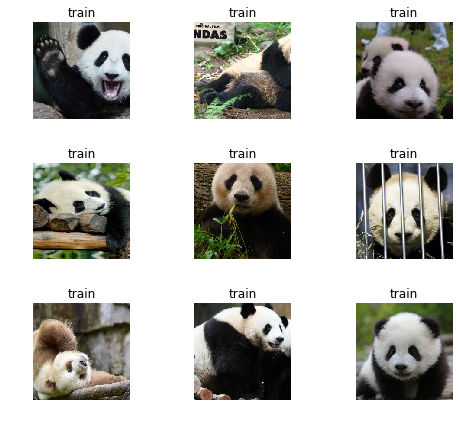

In [130]:
data.show_batch(rows=3, figsize=(7,6))
